**MOVIE REVIEW PREDICTION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec, FastText
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import xgboost as xgb
from tqdm import tqdm
import regex as re
import string   # used for removing punctations and also for converting lower case of data
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")

Importing IMDB dataset into Data

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/IMDB Dataset (1).csv',on_bad_lines='skip')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


copying data set into df1 varabile

In [ ]:
df1=data.copy()

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df1["sentiment"].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
df1.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

 Removing HTML TAGS  


In [ ]:
import re

def remove_html_tags(text):
    # Use regex to remove HTML tags
    cleaned_text = re.sub(r'<[^>]*>', '',text)
    return cleaned_text
df1['review'] = df1['review'].astype(str).apply(remove_html_tags)
df1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


1. Lowercasing
Convert all text to lowercase

In [ ]:
df1['review']=df1['review'].str.lower()


2. Removing Special Characters and Numbers

In [ ]:
import re

# Function to remove special characters
def remove_special_characters(text):
    # Use regex to remove special characters
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return cleaned_text

# Apply the function to the 'review' column
df1['review'] = df1['review'].astype(str).apply(remove_special_characters)

# Display the first few rows of the cleaned DataFrame
df1.head()


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [ ]:
df1.loc[data['sentiment'] == 'positive', 'sentiment'] = 1
df1.loc[data['sentiment'] == 'negative', 'sentiment'] = 0

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Text Analysis and preprocessing

In [ ]:
# Get the English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    # Tokenize the text into words
    words = text.split()
    # Filter out the stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a string
    return " ".join(filtered_words)

# Apply the function to the 'review' column
df1['review'] = df1['review'].apply(remove_stopwords)

# Display the first few rows of the cleaned DataFrame
df1.head()


,review,sentiment
0,one reviewers mentioned watching oz episode yo...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


In [ ]:
df2=df1.copy()

Word Tokenization is most preferable for sentiment analysis tasks on IMDB datasets because:

Each word carries significant sentiment information.

In [ ]:
#tokenization
import nltk
from nltk.tokenize import word_tokenize
# Tokenize each review into words
df2['word_tokens'] = df2['review'].apply(word_tokenize)

# Display the first few rows with tokens
df2[['review', 'word_tokens']].head()


,review,word_tokens
0,one reviewers mentioned watching oz episode yo...,"[one, reviewers, mentioned, watching, oz, epis..."
1,wonderful little production filming technique ...,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su..."
3,basically theres family little boy jake thinks...,"[basically, theres, family, little, boy, jake,..."
4,petter matteis love time money visually stunni...,"[petter, matteis, love, time, money, visually,..."


Lemmatization



In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

# Ensure you have the necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a lemmatization function
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply lemmatization to the tokenized words
df2['lemmatized_tokens'] = df2['word_tokens'].apply(lemmatize_tokens)

# Display the first few rows with lemmatized tokens
df2[['review', 'word_tokens', 'lemmatized_tokens']].head()

,review,word_tokens,lemmatized_tokens
0,one reviewers mentioned watching oz episode yo...,"[one, reviewers, mentioned, watching, oz, epis...","[one, reviewer, mentioned, watching, oz, episo..."
1,wonderful little production filming technique ...,"[wonderful, little, production, filming, techn...","[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonderful, way, spend, time, hot, su..."
3,basically theres family little boy jake thinks...,"[basically, theres, family, little, boy, jake,...","[basically, there, family, little, boy, jake, ..."
4,petter matteis love time money visually stunni...,"[petter, matteis, love, time, money, visually,...","[petter, matteis, love, time, money, visually,..."


In [ ]:
df2['review']=df1['review'].apply(lambda x:x.split())
df2.head()

,review,sentiment,word_tokens,lemmatized_tokens
0,"[one, reviewers, mentioned, watching, oz, epis...",1,"[one, reviewers, mentioned, watching, oz, epis...","[one, reviewer, mentioned, watching, oz, episo..."
1,"[wonderful, little, production, filming, techn...",1,"[wonderful, little, production, filming, techn...","[wonderful, little, production, filming, techn..."
2,"[thought, wonderful, way, spend, time, hot, su...",1,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonderful, way, spend, time, hot, su..."
3,"[basically, theres, family, little, boy, jake,...",0,"[basically, theres, family, little, boy, jake,...","[basically, there, family, little, boy, jake, ..."
4,"[petter, matteis, love, time, money, visually,...",1,"[petter, matteis, love, time, money, visually,...","[petter, matteis, love, time, money, visually,..."


Wordcolud

In [ ]:
!pip install wordcloud

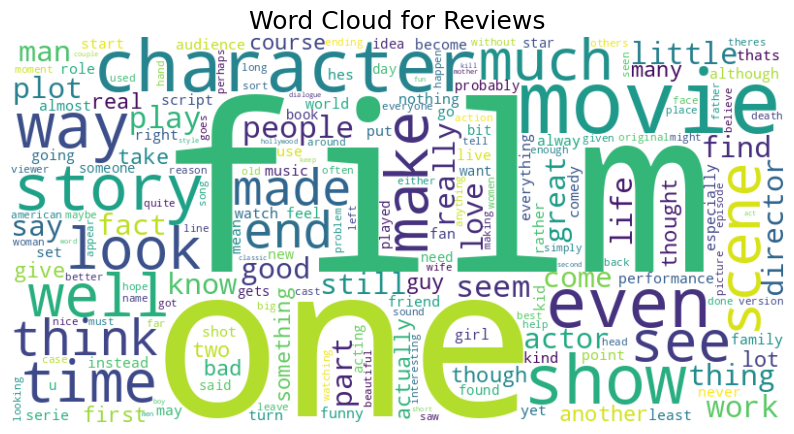

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
all_reviews = ' '.join(df1['review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.title("Word Cloud for Reviews", fontsize=18)
plt.show()


Word to vec using FastTextModel

In [ ]:
#word to vec
# Train the FastText model
model = FastText(sentences=df2['lemmatized_tokens'], vector_size=300, window=5, min_count=5, sg =1)

# Now you can access the word vectors
model.wv['movie reveiw']


array([-0.08207389,  0.09195215, -0.01015562, -0.01003876, -0.1643183 ,
       -0.04405309,  0.06049143,  0.12591818,  0.10536879, -0.04743472,
       -0.12287924, -0.05361212,  0.07886208,  0.00091574,  0.08807687,
       -0.00334377,  0.094837  , -0.03500703,  0.08955556,  0.05155058,
       -0.05131801,  0.02717597,  0.05175189,  0.00045897,  0.13609573,
       -0.01620079, -0.03338357,  0.06514487, -0.03982117, -0.15191741,
        0.05181497,  0.05482872, -0.02109598,  0.09139054, -0.0929071 ,
        0.13769853, -0.12179238,  0.06165608,  0.00933043,  0.03784887,
       -0.05030884,  0.02293481, -0.00591116, -0.0332257 , -0.1598953 ,
       -0.03259011, -0.05477137,  0.17960498,  0.10129335,  0.1195167 ,
       -0.12662639,  0.13446638, -0.0092391 ,  0.05377087, -0.13528521,
       -0.04954125,  0.06928568,  0.07183849,  0.06344382, -0.04762742,
       -0.01761676,  0.01799292, -0.00517054, -0.0187572 ,  0.03808918,
        0.02332607, -0.06716704,  0.05893279, -0.08870579, -0.00

In [ ]:
len(model.wv['movie reveiw'])

300

 Word2vec feature extraction from cleaned data


In [ ]:
# Function to get the average word vector for a document
def get_avg_word_vector(tokens):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if not vectors:
        # If no in-vocabulary words are present, return a default vector (zeros in this case)
        return np.zeros(model.vector_size)
    else:
        return sum(vectors) / len(vectors) # vector representation of sentence


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review             50000 non-null  object
 1   sentiment          50000 non-null  object
 2   word_tokens        50000 non-null  object
 3   lemmatized_tokens  50000 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


LogisticRegression

Logistic Regression Accuracy: 0.8767
Confusion Matrix:
[[4312  649]
 [ 584 4455]]
True Negatives (TN): 4312
False Positives (FP): 649
False Negatives (FN): 584
True Positives (TP): 4455

Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.87      0.87      4961
    Positive       0.87      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



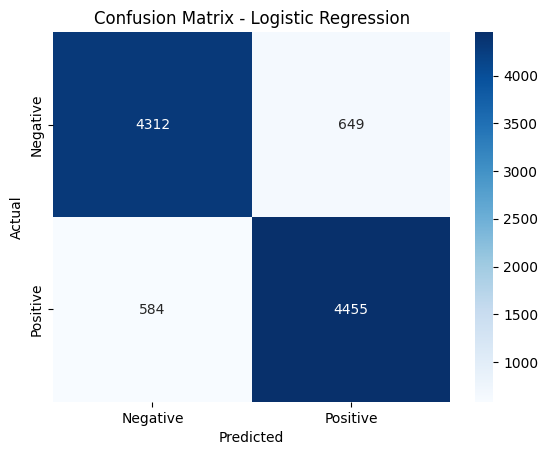

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df2['review_vector'] = df2['review'].apply(get_avg_word_vector)
X = np.array(df2['review_vector'].tolist()) # Convert to numpy array for model compatibility

# 2. Target Variable
y = df2['sentiment'].astype(int).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Confusion Matrix and Accuracy
cm_lr = confusion_matrix(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Extract Confusion Matrix Values
tn, fp, fn, tp = cm_lr.ravel()

# Print Confusion Matrix Values
print(f"Confusion Matrix:\n{cm_lr}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Precision, Recall, F1-Score
report = classification_report(y_test, y_pred_lr, target_names=['Negative', 'Positive'])
print("\nClassification Report:\n", report)

# Plot Confusion Matrix
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


XGBClassifier

XGBoost Accuracy: 0.8723
Confusion Matrix:
[[4286  675]
 [ 602 4437]]
True Negatives (TN): 4286
False Positives (FP): 675
False Negatives (FN): 602
True Positives (TP): 4437

Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.86      0.87      4961
    Positive       0.87      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



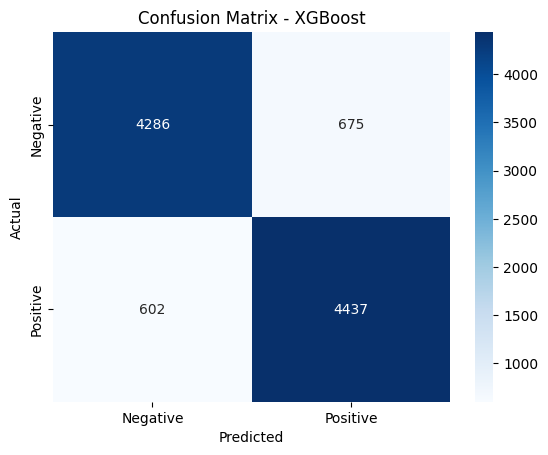

In [ ]:
from xgboost import XGBClassifier

# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


df2['review_vector'] = df2['review'].apply(get_avg_word_vector)
X = np.array(df2['review_vector'].tolist()) # Convert to numpy array for model compatibility

# 2. Target Variable
y = df2['sentiment'].astype(int).values

# Train-test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predictions
y_pred_xgb = xgb_model.predict(X1_test)

# Confusion Matrix and Accuracy
cm_xgb = confusion_matrix(y1_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y1_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# Extract Confusion Matrix Values
tn, fp, fn, tp = cm_xgb.ravel()

# Print Confusion Matrix Values
print(f"Confusion Matrix:\n{cm_xgb}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Precision, Recall, F1-Score
report = classification_report(y1_test, y_pred_xgb, target_names=['Negative', 'Positive'])
print("\nClassification Report:\n", report)


# Plot Confusion Matrix
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Navie Bayes

Naive Bayes Accuracy: 0.7865
Confusion Matrix:
[[3956 1005]
 [1130 3909]]
True Negatives (TN): 3956
False Positives (FP): 1005
False Negatives (FN): 1130
True Positives (TP): 3909

Classification Report:
               precision    recall  f1-score   support

    Negative       0.78      0.80      0.79      4961
    Positive       0.80      0.78      0.79      5039

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



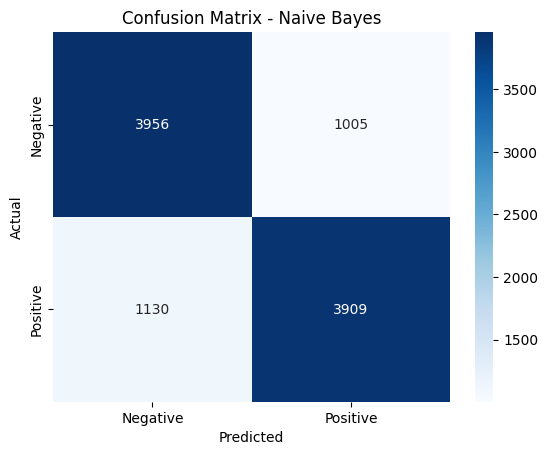

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

df2['review_vector'] = df2['review'].apply(get_avg_word_vector)
X = np.array(df2['review_vector'].tolist()) # Convert to numpy array for model compatibility

# 2. Target Variable
y = df2['sentiment'].astype(int).values

# Train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Predictions
y_pred_nb = nb_model.predict(X2_test)

# Confusion Matrix and Accuracy
cm_nb = confusion_matrix(y2_test, y_pred_nb)
accuracy_nb = accuracy_score(y2_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# Extract Confusion Matrix Values
tn, fp, fn, tp = cm_nb.ravel()

# Print Confusion Matrix Values
print(f"Confusion Matrix:\n{cm_nb}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Precision, Recall, F1-Score
report = classification_report(y_test, y_pred_nb, target_names=['Negative', 'Positive'])
print("\nClassification Report:\n", report)

# Plot Confusion Matrix
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


RandomForestClassifier

Random Forest Accuracy: 0.8465

Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.83      0.84      4961
    Positive       0.84      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix:
[[4107  854]
 [ 681 4358]]
True Negatives (TN): 4107
False Positives (FP): 854
False Negatives (FN): 681
True Positives (TP): 4358


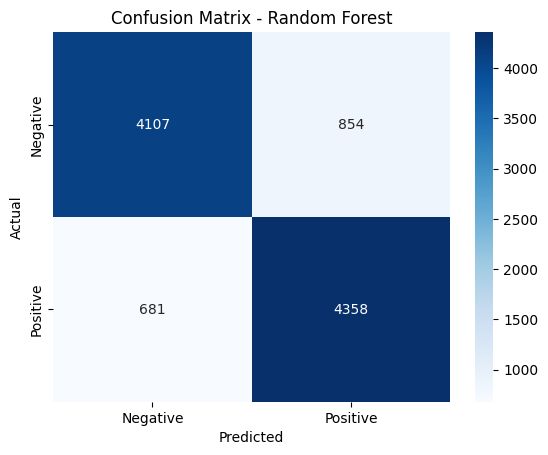

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `X` (features) and `y` (target) are already defined
# If using word embeddings, ensure `X` is a NumPy array

# Train-test split
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X4_train, y4_train)

# Predictions
y_pred_rf = rf_model.predict(X4_test)

# Confusion Matrix and Accuracy
cm_rf = confusion_matrix(y4_test, y_pred_rf)
accuracy_rf = accuracy_score(y4_test, y_pred_rf)

# Print Metrics
print("Random Forest Accuracy:", accuracy_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=['Negative', 'Positive']))

# Extract Confusion Matrix Values
tn, fp, fn, tp = cm_rf.ravel()
print(f"Confusion Matrix:\n{cm_rf}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Plot Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**TFIDF**

In [ ]:
# Preprocessing
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Remove HTML tags
def remove_html_tags(text):
    return re.sub(r'<[^>]*>', '', text)

In [ ]:
df1['review'] = df1['review'].astype(str).apply(remove_html_tags)

In [ ]:
# Convert to lowercase
df1['review'] = df1['review'].str.lower()

In [ ]:
# Remove special characters
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

In [ ]:
df1['review'] = df1['review'].apply(remove_special_characters)

In [ ]:
# Remove stopwords
def remove_stopwords(text):
    words = text.split()
    return " ".join([word for word in words if word not in stop_words])

In [ ]:
df1['review'] = df1['review'].apply(remove_stopwords)

In [ ]:
# Encode sentiment labels
df1.loc[df1['sentiment'] == 'positive', 'sentiment'] = 1
df1.loc[df1['sentiment'] == 'negative', 'sentiment'] = 0
df1['sentiment'] = df1['sentiment'].astype(int)

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df1['review']).toarray()
y = df1['sentiment'].values

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, target_names=['Negative', 'Positive']))

Logistic Regression Accuracy: 0.8871

Classification Report:
               precision    recall  f1-score   support

    Negative       0.90      0.87      0.88      4961
    Positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb, target_names=['Negative', 'Positive']))

Naive Bayes Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.81      0.80      4961
    Positive       0.81      0.79      0.80      5039

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=['Negative', 'Positive']))

Random Forest Accuracy: 0.8498

Classification Report:
               precision    recall  f1-score   support

    Negative       0.84      0.86      0.85      4961
    Positive       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
# XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, target_names=['Negative', 'Positive']))

XGBoost Accuracy: 0.8549

Classification Report:
               precision    recall  f1-score   support

    Negative       0.87      0.83      0.85      4961
    Positive       0.84      0.88      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



CONCLUSION:
In this project, we created a system to determine if movie reviews are positive or negative using Natural Language Processing (NLP). The model performed well, achieving an accuracy of 87 after cleaning the data and using advanced techniques. It worked well for most reviews but struggled with tricky ones, like sarcasm. Overall, this project highlights how useful NLP is for understanding reviews. We used methods like logistic regression, XGBoost, Naive Bayes, and random forest.